# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.107684e+01     7.670970e+00
 * time: 0.003111124038696289
     1     2.861937e+01     6.598446e+00
 * time: 0.010232210159301758
     2     2.843317e+01     1.391171e+01
 * time: 0.025179147720336914
     3     1.531413e+01     3.301632e+00
 * time: 0.04292702674865723
     4     1.245555e+01     1.774289e+00
 * time: 0.058030128479003906
     5     1.105434e+01     9.372076e-01
 * time: 0.07291221618652344
     6     1.041664e+01     1.559768e+00
 * time: 0.0849921703338623
     7     1.007249e+01     7.945536e-01
 * time: 0.0973501205444336
     8     9.849383e+00     7.091315e-01
 * time: 0.10972213745117188
     9     9.703449e+00     5.851086e-01
 * time: 0.1221001148223877
    10     9.574569e+00     6.063436e-01
 * time: 0.13450002670288086
    11     9.469794e+00     3.346810e-01
 * time: 0.14706206321716309
    12     9.417427e+00     4.887489e-01
 * time: 0.1573960781097412
    13     9.374864e+00     3.876688e-01
 * time:

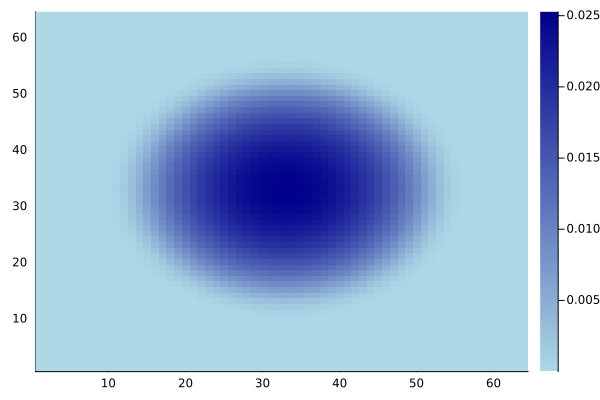

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)